In [38]:
import pandas as pd
import yahoo_fin.stock_info as yf
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
now = datetime.now()

In [35]:
spDf = yf.get_data('^GSPC', start_date="1995-01-06",end_date = '2022-04-09', index_as_date = True)
spDf = spDf[~spDf.index.duplicated()]
spDf['close'] = spDf['close'].rolling(window=5).apply(lambda x: np.average(x))
spDf['Dates'] = pd.to_datetime(spDf.index)
spFDf = spDf[spDf['Dates'].dt.weekday == 4]
spMDf = spDf[spDf['Dates'].dt.weekday == 0]
spDf = spDf.drop('Dates', axis = 1)
# spDf.to_pickle("stockData/Spy.pkl")
print(spFDf)

                   open         high          low        close     adjclose  \
1995-01-06   460.380005   462.489990   459.470001          NaN   460.679993   
1995-01-13   461.640015   466.429993   461.640015   462.356000   465.970001   
1995-01-20   466.950012   466.989990   463.989990   468.173999   464.779999   
1995-01-27   468.320007   471.359985   468.320007   467.566003   470.390015   
1995-02-03   472.779999   479.910004   472.779999   472.154004   478.649994   
...                 ...          ...          ...          ...          ...   
2022-03-11  4279.500000  4291.009766  4200.490234  4222.700000  4204.310059   
2022-03-18  4407.339844  4465.399902  4390.569824  4333.641992  4463.120117   
2022-03-25  4522.910156  4546.029785  4501.069824  4498.450098  4543.060059   
2022-04-01  4540.319824  4548.700195  4507.569824  4577.168066  4545.859863   
2022-04-08  4494.149902  4520.410156  4474.600098  4515.479980  4488.279785   

                volume ticker      Dates  
1995-01-

In [26]:
total = 100
# spDf = pd.read_pickle('stockData/Spy.pkl')
allocation = 0

In [27]:
for index, element in spMDf.iterrows():
    if allocation == 0:
        allocation = total / element.open
        # print(allocation)
    if index + timedelta(days=4) in spFDf.index:
        total = total - allocation * spFDf.loc[index + timedelta(days=4)].close   
print(total)

-440856.9349387405


100
112.26604586983593
119.80861754784922
112.32129165477323
132.6760663487068
132.62955862375944
133.8842342409719
131.8014434919851
130.74541951398086
125.79861708400884
123.06834219555924
120.96891101042264
119.17419442858296
117.93738655779813
117.03232437739136
122.74216882258044
169.27869957845678
174.03545174569805
170.40197931013833
179.31101597813156
173.05542617563302
171.4054147598383
166.76947265872326
162.66981756582356
160.92064441084312
166.60951710341712
162.5413135124048
161.09027363791049
164.72657110781407
162.38285600460372
166.03121788965825
166.5881619182064


<AxesSubplot:>

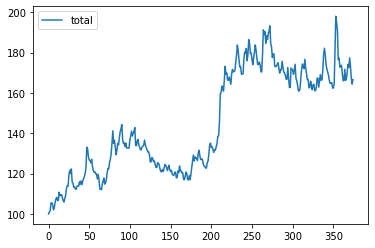

In [48]:
df = pd.read_pickle("0.12670742563044157.pkl")
df['shortSPYTotal'] = 100
df = df[df.index - pd.to_datetime('2000-09-01') > timedelta(0)]
newDf = pd.DataFrame()
newDf['total'] = 0
total = 100
gold = yf.get_data("GC=F", start_date="1995-01-06",end_date = now, index_as_date = True)
bearish = False
allocation = 0
originalTotal = 0
for index, element in df.iterrows():
    if len(element.holding) == 0:
        if allocation == 0:
            allocation = total / spFDf.loc[index].close
            print(total)
            originalTotal = total
        else:
            total = 2 * originalTotal - spFDf.loc[index].close * allocation
        newDf = newDf.append({'total': total}, ignore_index = True)
    elif allocation != 0:
        total = 2 * originalTotal - spFDf.loc[index].close * allocation
        allocation = 0
        originalTotal = 0
        newDf = newDf.append({'total': total}, ignore_index = True)
    df.loc[index,'shortSPYTotal'] = total
    
print(total)

            
# df['shortSPYTotal'].plot()
newDf.plot()

In [49]:
newDf.to_pickle('shortSPY.pkl')